# Лабораторная работа №5 "Разметка"

In [23]:
import json
from pycocotools.coco import COCO

In [24]:
path = "./data/CatsAndDogsDetection/result.json"
f = open(path)
anns = json.load(f)
anns.keys()

dict_keys(['images', 'categories', 'annotations', 'info'])

In [25]:
anns["categories"]

[{'id': 0, 'name': 'cat'}, {'id': 1, 'name': 'dog'}]

In [27]:
coco=COCO(path)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [28]:
image_ids = coco.getImgIds(catIds=[1])
print("Total dogs: ", len(image_ids))
image_ids = coco.getImgIds(catIds=[0])
print("Total cats: ", len(image_ids))

Total dogs:  24
Total cats:  26


In [33]:
annotation_ids = coco.getAnnIds(imgIds=[42], catIds=[0,1])
anns = coco.loadAnns(annotation_ids)
anns

[{'id': 42,
  'image_id': 42,
  'category_id': 0,
  'segmentation': [],
  'bbox': [78.41207349081357, 0.0, 359.9081364829389, 362.20472440944854],
  'ignore': 0,
  'iscrowd': 0,
  'area': 130360.42738752108}]

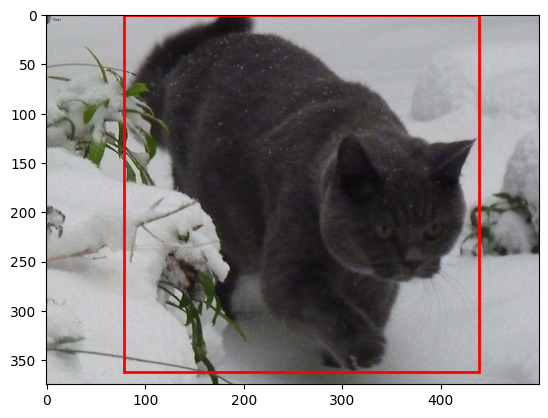

In [34]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
 
image_id = 42
 
images_path = "./data/CatsAndDogsDetection/images/"
image_name = "5a000cf2-British_Shorthair_34.jpg"
image = Image.open(images_path+image_name)
 
fig, ax = plt.subplots()
 
for ann in anns:
    box = ann['bbox']
    bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2, edgecolor="red", facecolor="none")
    ax.add_patch(bb)
 
ax.imshow(image)
plt.show()